In [74]:
import gym # gym is created by OpenAI for training and developing Reinforcement learning projects with different environments

In [75]:
env = gym.make('FrozenLake-v1')  # we are going to use the FrozenLake enviornment

In [76]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [106]:
env.reset()  # reset enviornment to default state

0

In [107]:
action = env.action_space.sample()  # get a random action
print(action)

0


In [108]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action
print(new_state, reward, done, info)

4 0.0 False {'prob': 0.3333333333333333}


In [ ]:
env.render()   # render the GUI for the enviornment, however its not supported for this selected env

#Frozen Lake Enviornment
Now that we have a basic understanding of how the gym enviornment works it's time to discuss the specific problem we will be solving.

The enviornment we loaded above FrozenLake-v1 is one of the simplest enviornments in Open AI Gym. The goal of the agent is to navigate a frozen lake and find the Goal without falling through the ice (render the enviornment above to see an example).

There are:

16 states (one for each square)
4 possible actions (LEFT, RIGHT, DOWN, UP)
4 different types of blocks (F: frozen, H: hole, S: start, G: goal)

#Building the Q-Table
The first thing we need to do is build an empty Q-Table that we can use to store and update our values.

In [110]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [111]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

###Constants
As we discussed we need to define some constants that will be used to update our Q-Table and tell our agent when to stop training.

In [112]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96 # discount factor, actually determines how much the expected rewards of next state to be taken into account when updating the current state values

###Picking an Action
Remember that we can pick an action using one of two methods:
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action.

Here we will define a new value $\epsilon$ that will tell us the probabillity of selecting a random action. This value will start off very high and slowly decrease as the agent learns more about the enviornment.

In [118]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

# Actually implementing the algorithm

Now we put everything together

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9

In [122]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[1.03822163e-01 1.74180531e-02 2.36772603e-02 2.32734497e-02]
 [6.13784043e-03 5.40628514e-03 9.31812471e-03 1.57586089e-01]
 [2.02479219e-01 9.11923300e-03 8.23821845e-03 8.52356652e-03]
 [5.46025060e-03 1.98572903e-03 1.58546786e-03 8.68165207e-03]
 [1.97033882e-01 2.61955422e-02 1.16600170e-02 1.10790606e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.72010433e-05 1.33384174e-07 4.24649851e-02 4.87977993e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.99809819e-03 1.35773226e-02 1.13295383e-02 1.95765216e-01]
 [1.74353465e-02 2.60050950e-01 4.26147236e-03 2.53159858e-02]
 [6.21961636e-01 3.28566858e-03 4.56232166e-03 2.30061980e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00292406e-01 1.26340531e-01 4.62992092e-01 2.90156274e-03]
 [1.85038296e-01 9.14569028e-01 1.89853442e-01 1.93863767e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

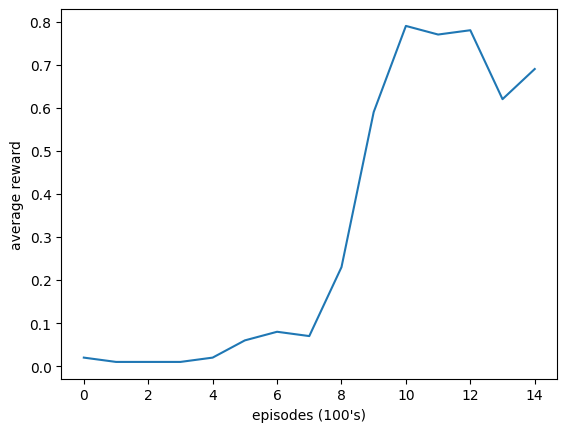

In [123]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

# Source:

FreeCodeCamp TensorFlow tutorial:
https://www.freecodecamp.org/learn/machine-learning-with-python/tensorflow/reinforcement-learning-with-q-learning-example